In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data
df = pd.read_csv("/content/sample_data/gld_price_data.csv")

# Rename columns
df.columns = ['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# Sort by date
df.sort_index(inplace=True)

# Show sample
print(df.head())

                    SPX        GLD        USO     SLV   EUR/USD
Date                                                           
2008-01-02  1447.160034  84.860001  78.470001  15.180  1.471692
2008-01-03  1447.160034  85.570000  78.370003  15.285  1.474491
2008-01-04  1411.630005  85.129997  77.309998  15.167  1.475492
2008-01-07  1416.180054  84.769997  75.500000  15.053  1.468299
2008-01-08  1390.189941  86.779999  76.059998  15.590  1.557099


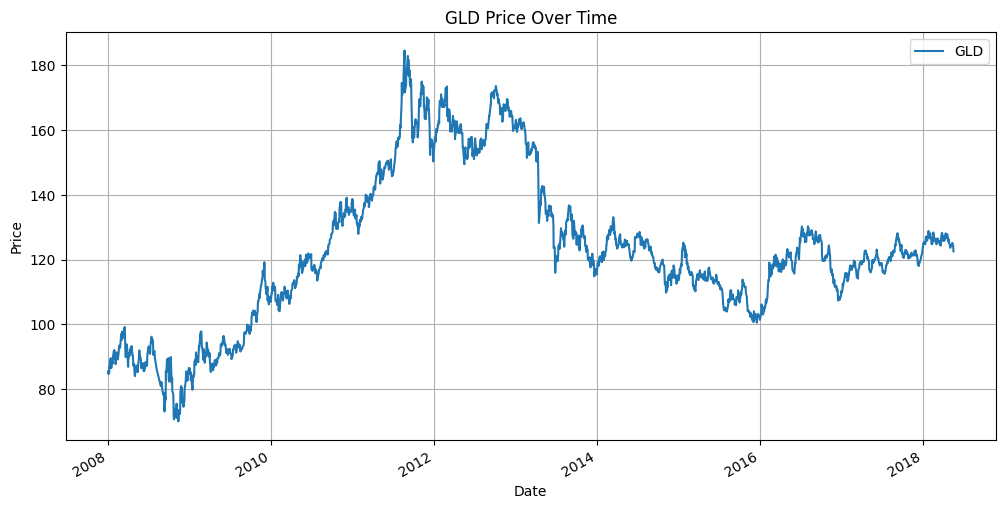

In [3]:
gld_series = df[['GLD']].copy()
gld_series.plot(figsize=(12,6), title='GLD Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [4]:
train_size = int(len(gld_series) * 0.8)
train, test = gld_series[:train_size], gld_series[train_size:]

In [7]:
import pandas as pd

# Load the dataset (if not already loaded)
df = pd.read_csv('/content/sample_data/gld_price_data.csv')

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Optional: check the DataFrame
print(df.head())


                    SPX        GLD        USO     SLV   EUR/USD
Date                                                           
2008-01-02  1447.160034  84.860001  78.470001  15.180  1.471692
2008-01-03  1447.160034  85.570000  78.370003  15.285  1.474491
2008-01-04  1411.630005  85.129997  77.309998  15.167  1.475492
2008-01-07  1416.180054  84.769997  75.500000  15.053  1.468299
2008-01-08  1390.189941  86.779999  76.059998  15.590  1.557099


In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load and prepare the data
df = pd.read_csv('/content/sample_data/gld_price_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Keep only the 'GLD' column (or you can use others if modeling multivariate)
gld = df[['GLD']]

# Step 1: Differencing to remove trend (stationarity)
gld_diff = gld.diff().dropna()

# Step 2: Scaling for models like LSTM
scaler = MinMaxScaler()
gld_scaled = scaler.fit_transform(gld_diff)

# Step 3: Create supervised learning data (X, y) using sliding window
def create_dataset(data, window_size=10):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

import numpy as np
window_size = 10
X, y = create_dataset(gld_scaled, window_size=window_size)

# Step 4: Train-test split (80-20)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Final shape check
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Missing values:
 SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64
Train shape: (1823, 10, 1) (1823, 1)
Test shape: (456, 10, 1) (456, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1547 - val_loss: 0.0020
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0078 - val_loss: 0.0013
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0080 - val_loss: 0.0013
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0071 - val_loss: 0.0013
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0072 - val_loss: 0.0015
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0058 - val_loss: 0.0018
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0069 - val_loss: 0.0013
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0062 - val_loss: 0.0013
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0061 - val_loss: 0.0013
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0062 - val_loss: 0.0013
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0057 - val_loss: 0.0015
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0

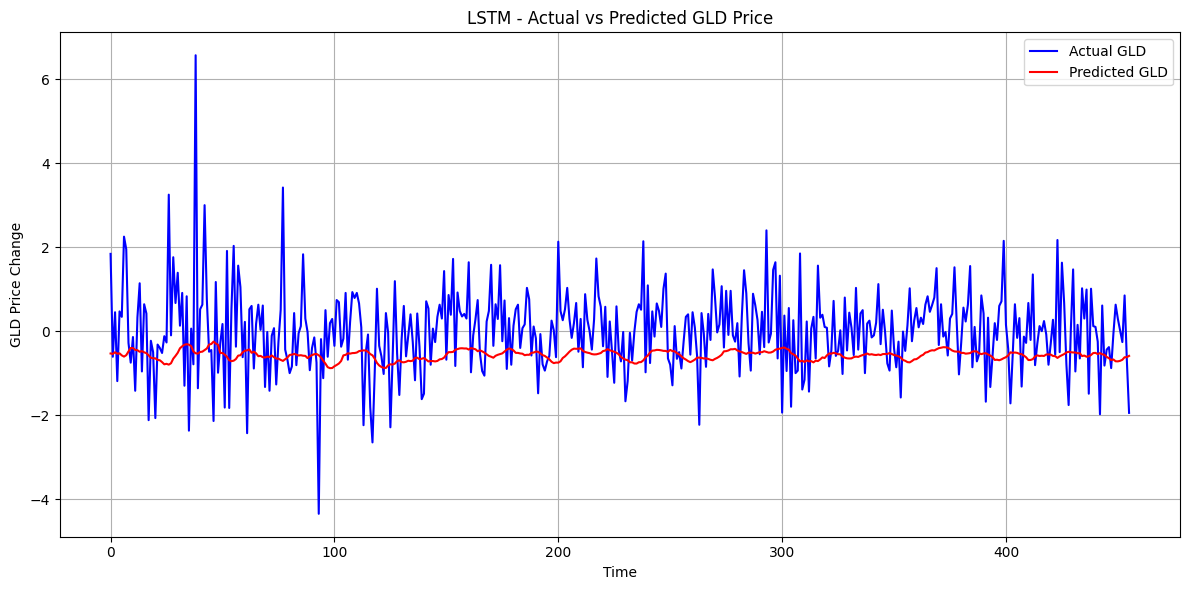

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # output layer

# Step 2: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 3: Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Step 4: Make predictions
predicted = model.predict(X_test)

# Step 5: Inverse scale the predictions (if needed)
predicted_actual_scale = scaler.inverse_transform(predicted)
y_test_actual_scale = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 6: Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual_scale, color='blue', label='Actual GLD')
plt.plot(predicted_actual_scale, color='red', label='Predicted GLD')
plt.title('LSTM - Actual vs Predicted GLD Price')
plt.xlabel('Time')
plt.ylabel('GLD Price Change')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

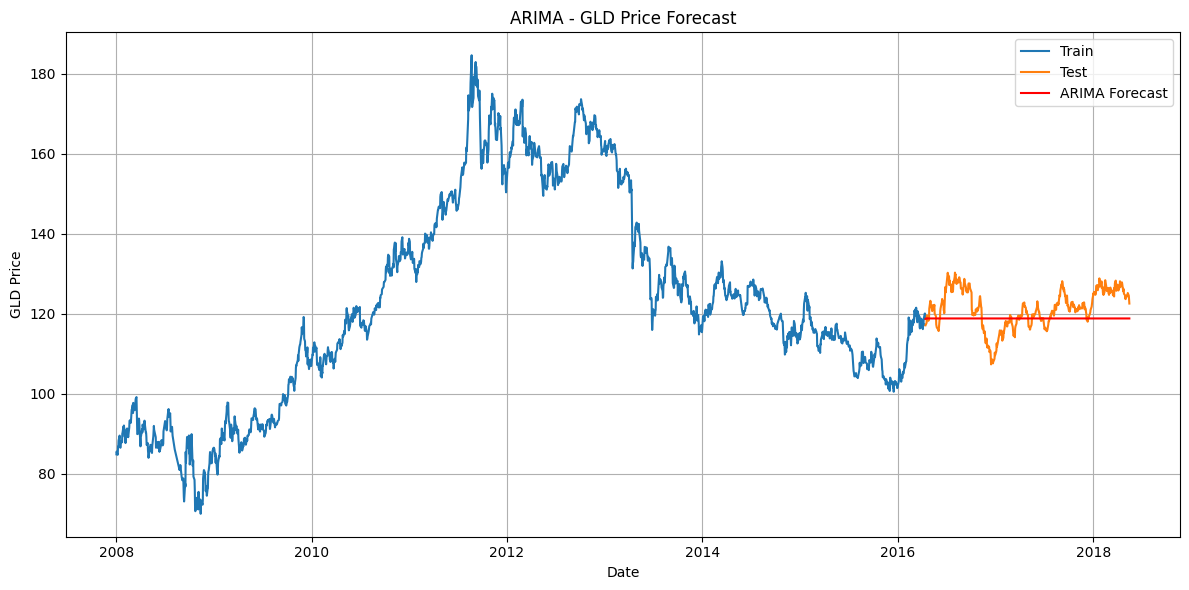

In [11]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Use the original (non-scaled) GLD column
gld = df['GLD']

# Split train-test
train_size = int(len(gld) * 0.8)
train, test = gld[:train_size], gld[train_size:]

# Fit ARIMA model (order can be tuned)
model = ARIMA(train, order=(5, 1, 0))  # (p=5, d=1, q=0)
arima_result = model.fit()

# Forecast
forecast = arima_result.forecast(steps=len(test))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA - GLD Price Forecast')
plt.xlabel('Date')
plt.ylabel('GLD Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvftzms9i/47x1zc0r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvftzms9i/hoybrgvq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51864', 'data', 'file=/tmp/tmpvftzms9i/47x1zc0r.json', 'init=/tmp/tmpvftzms9i/hoybrgvq.json', 'output', 'file=/tmp/tmpvftzms9i/prophet_model2m69lvyu/prophet_model-20250522054959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:49:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:50:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


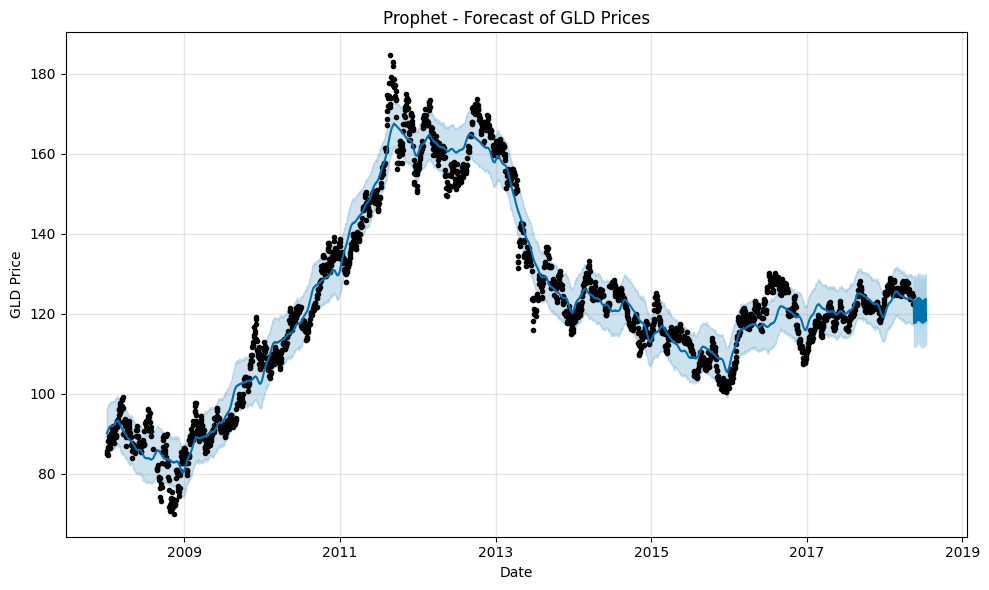

In [12]:
from prophet import Prophet

# Prepare data
gld_prophet = df.reset_index()[['Date', 'GLD']].rename(columns={'Date': 'ds', 'GLD': 'y'})

# Initialize and fit model
prophet_model = Prophet()
prophet_model.fit(gld_prophet)

# Create future dates
future = prophet_model.make_future_dataframe(periods=60)  # forecast 60 days into future

# Predict
forecast = prophet_model.predict(future)

# Plot forecast
prophet_model.plot(forecast)
plt.title('Prophet - Forecast of GLD Prices')
plt.xlabel('Date')
plt.ylabel('GLD Price')
plt.tight_layout()
plt.show()


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# ARIMA forecast for the exact length of the test data
forecast = arima_result.forecast(steps=len(test))

# Compare forecast vs actual
rmse = np.sqrt(mean_squared_error(test, forecast))  # Use 'test' and 'forecast'
mae = mean_absolute_error(test, forecast)  # Use 'test' and 'forecast'

print(f"ARIMA RMSE: {rmse}")
print(f"ARIMA MAE: {mae}")


ARIMA RMSE: 5.419088963309776
ARIMA MAE: 4.456770215912613


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Ensure forecast has the same index as the test set
forecast.index = test.index  # Align the forecast index with the test index

# Prophet forecast (only for the test period)
prophet_forecast = forecast  # Now, forecast is already aligned with test.index

# Ensure the lengths match
assert len(test) == len(prophet_forecast), "Test and forecast lengths do not match."

# ARIMA evaluation
arima_rmse = np.sqrt(mean_squared_error(test, forecast))  # For ARIMA model
arima_mae = mean_absolute_error(test, forecast)

# Prophet evaluation
prophet_rmse = np.sqrt(mean_squared_error(test, prophet_forecast))  # For Prophet model
prophet_mae = mean_absolute_error(test, prophet_forecast)

# Print evaluation metrics
print(f"ARIMA RMSE: {arima_rmse}")
print(f"ARIMA MAE: {arima_mae}")
print(f"Prophet RMSE: {prophet_rmse}")
print(f"Prophet MAE: {prophet_mae}")


lstm_rmse = np.sqrt(mean_squared_error(y_test_actual_scale, predicted_actual_scale))
lstm_mae = mean_absolute_error(y_test_actual_scale, predicted_actual_scale)
print(f"LSTM RMSE: {lstm_rmse}")
print(f"LSTM MAE: {lstm_mae}")





ARIMA RMSE: 5.419088963309776
ARIMA MAE: 4.456770215912613
Prophet RMSE: 5.419088963309776
Prophet MAE: 4.456770215912613
LSTM RMSE: 1.1541273018736706
LSTM MAE: 0.8921248894127775


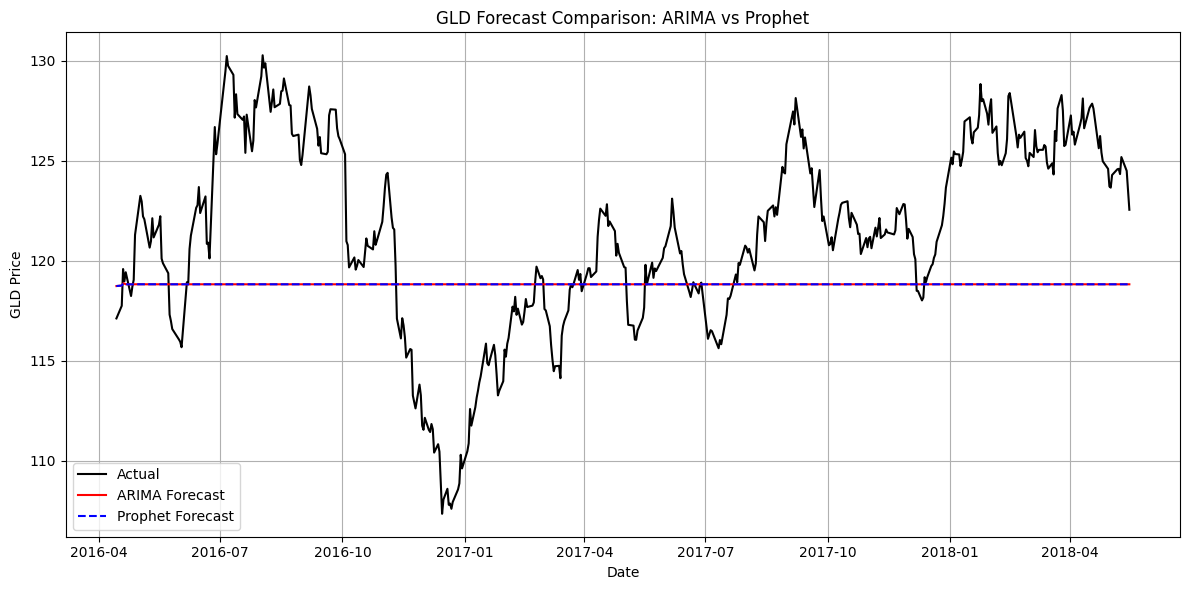

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual', color='black')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red')
plt.plot(test.index, prophet_forecast, label='Prophet Forecast', color='blue', linestyle='dashed')
plt.title('GLD Forecast Comparison: ARIMA vs Prophet')
plt.xlabel('Date')
plt.ylabel('GLD Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


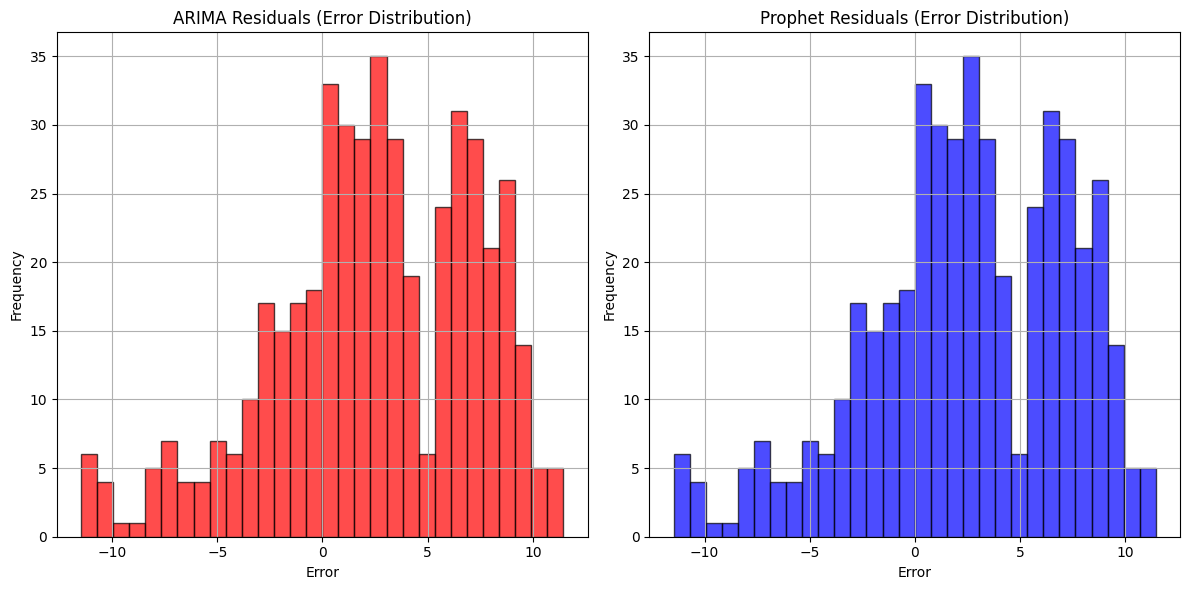

In [16]:
# Calculate residuals (errors) for ARIMA and Prophet
arima_residuals = test - forecast
prophet_residuals = test - prophet_forecast

# Plot residuals (error distribution) for both models
plt.figure(figsize=(12, 6))

# Plot ARIMA residuals
plt.subplot(1, 2, 1)
plt.hist(arima_residuals, bins=30, color='red', edgecolor='black', alpha=0.7)
plt.title('ARIMA Residuals (Error Distribution)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)

# Plot Prophet residuals
plt.subplot(1, 2, 2)
plt.hist(prophet_residuals, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Prophet Residuals (Error Distribution)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()



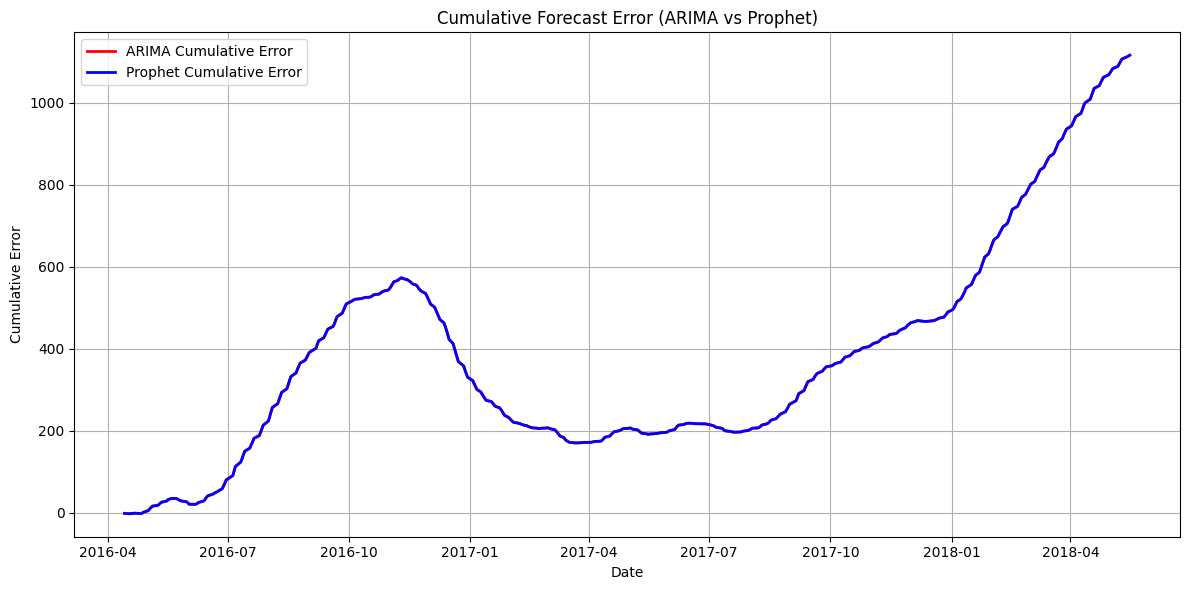

In [17]:
# Calculate cumulative sum of residuals (forecast errors)
arima_cumulative_error = arima_residuals.cumsum()
prophet_cumulative_error = prophet_residuals.cumsum()

# Plot cumulative forecast error
plt.figure(figsize=(12, 6))

# Plot cumulative error for ARIMA
plt.plot(test.index, arima_cumulative_error, label='ARIMA Cumulative Error', color='red', linewidth=2)

# Plot cumulative error for Prophet
plt.plot(test.index, prophet_cumulative_error, label='Prophet Cumulative Error', color='blue', linewidth=2)

# Customize the plot
plt.title('Cumulative Forecast Error (ARIMA vs Prophet)')
plt.xlabel('Date')
plt.ylabel('Cumulative Error')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()



In [18]:
# Check the first few residuals
print(arima_residuals.head())
print("ARIMA cumulative error sample:", np.round(np.cumsum(arima_cumulative_error[:5]), 2))
print("Prophet cumulative error sample:", np.round(np.cumsum(prophet_cumulative_error[:5]), 2))
print("ARIMA residuals sample:", arima_residuals[:5].values)
print("Prophet residuals sample:", prophet_residuals[:5].values)



Date
2016-04-14   -1.618690
2016-04-18   -1.013812
2016-04-19    0.726444
2016-04-20    0.113854
2016-04-21    0.602305
dtype: float64
ARIMA cumulative error sample: Date
2016-04-14   -1.62
2016-04-18   -4.25
2016-04-19   -6.16
2016-04-20   -7.95
2016-04-21   -9.14
dtype: float64
Prophet cumulative error sample: Date
2016-04-14   -1.62
2016-04-18   -4.25
2016-04-19   -6.16
2016-04-20   -7.95
2016-04-21   -9.14
dtype: float64
ARIMA residuals sample: [-1.61869027 -1.01381202  0.72644387  0.11385421  0.60230503]
Prophet residuals sample: [-1.61869027 -1.01381202  0.72644387  0.11385421  0.60230503]


In [19]:
!pip install arch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 11.8 MB/s eta 0:00:00


In [20]:
import numpy as np
from scipy.stats import t

def diebold_mariano_test(e1, e2, h=1, power=2):
    """
    Perform Diebold-Mariano test for forecast accuracy.
    :param e1: forecast errors from model 1 (array-like)
    :param e2: forecast errors from model 2 (array-like)
    :param h: forecast horizon (default is 1)
    :param power: loss function power (1 = absolute error, 2 = squared error)
    :return: DM statistic, p-value
    """
    e1 = np.array(e1)
    e2 = np.array(e2)

    # Compute loss differential
    d = np.abs(e1)**power - np.abs(e2)**power

    # Mean and variance of loss differential
    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)

    # DM statistic
    dm_stat = mean_d / np.sqrt((var_d / len(d)))

    # p-value from t-distribution
    dof = len(d) - 1
    p_value = 2 * t.sf(np.abs(dm_stat), df=dof)

    return dm_stat, p_value


# ARIMA and Prophet residuals (from your previous code)
e1 = (test.values - forecast.values).flatten()           # ARIMA errors
e2 = (test.values - prophet_forecast.values).flatten()   # Prophet errors

dm_stat, p_value = diebold_mariano_test(e1, e2, h=1, power=2)

print(f"Diebold-Mariano statistic: {dm_stat}")
print(f"p-value: {p_value}")

print("ARIMA errors mean:", np.mean(e1))
print("Prophet errors mean:", np.mean(e2))
print("Mean difference of squared errors:", np.mean(np.square(e1) - np.square(e2)))
print("Variance of loss differential:", np.var(np.square(e1) - np.square(e2)))



Diebold-Mariano statistic: nan
p-value: nan
ARIMA errors mean: 2.4362236802898223
Prophet errors mean: 2.4362236802898223
Mean difference of squared errors: 0.0
Variance of loss differential: 0.0


<ipython-input-20-12735f936f84>:24: RuntimeWarning: invalid value encountered in scalar divide
  dm_stat = mean_d / np.sqrt((var_d / len(d)))


     Model      RMSE       MAE
0     LSTM  1.154127  0.892125
1    ARIMA  5.419089  4.456770
2  Prophet  5.419089  4.456770


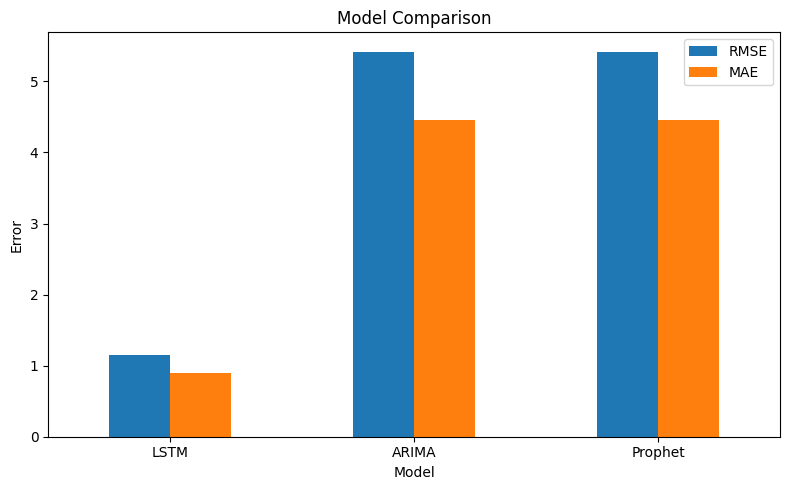

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Create comparison DataFrame
metrics_df = pd.DataFrame({
    'Model': ['LSTM', 'ARIMA', 'Prophet'],
    'RMSE': [lstm_rmse, arima_rmse, prophet_rmse],
    'MAE': [lstm_mae, arima_mae, prophet_mae]
})

print(metrics_df)

# Bar plot
metrics_df.set_index('Model')[['RMSE', 'MAE']].plot(kind='bar', figsize=(8,5), title="Model Comparison")
plt.ylabel("Error")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - loss: 0.0833 - val_loss: 0.0071
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0070 - val_loss: 5.3161e-04
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0054 - val_loss: 7.8884e-04
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0047 - val_loss: 5.6656e-04
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0048 - val_loss: 8.1108e-04
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0034 - val_loss: 4.8330e-04
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0036 - val_loss: 5.9893e-04
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0034 - val_loss: 5.3203e-04
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0035 - val_loss: 6.3704e-04
Epoch 10/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0031 - val_loss: 6.5837e-04
Epoch 11/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0032 - val_loss: 5.2493e-04
Epoch 12/20
28/28 ━━━━━

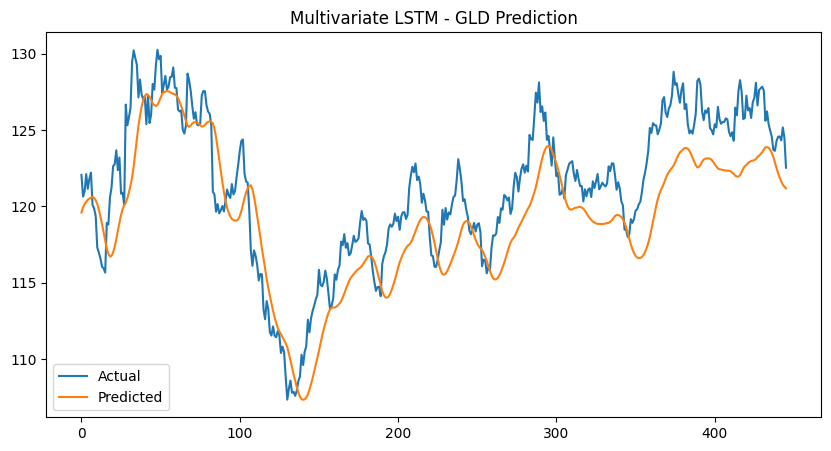

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load and filter necessary columns
df_1 = df[['GLD', 'SPX', 'USO', 'SLV', 'EUR/USD']].copy()

# Normalize all features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_1)
scaled_df_1 = pd.DataFrame(scaled_data, columns=df_1.columns, index=df_1.index)

# Set target column index (GLD)
target_col_index = 0

# Sequence generation function
def create_multivariate_sequences(data, target_col_index, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i])
        y.append(data[i, target_col_index])
    return np.array(X), np.array(y)

# Prepare sequences
X, y = create_multivariate_sequences(scaled_data, target_col_index, time_step=60)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Predict
y_pred = model.predict(X_test)

# Inverse transform
predicted_scaled = np.zeros((len(y_pred), scaled_data.shape[1]))
actual_scaled = np.zeros((len(y_test), scaled_data.shape[1]))
predicted_scaled[:, target_col_index] = y_pred.flatten()
actual_scaled[:, target_col_index] = y_test.flatten()

predicted_actual = scaler.inverse_transform(predicted_scaled)[:, target_col_index]
actual_actual = scaler.inverse_transform(actual_scaled)[:, target_col_index]

# Metrics
multi_rmse = np.sqrt(mean_squared_error(actual_actual, predicted_actual))
multi_mae = mean_absolute_error(actual_actual, predicted_actual)
print(f"Multivariate LSTM RMSE: {multi_rmse}")
print(f"Multivariate LSTM MAE: {multi_mae}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(actual_actual, label="Actual")
plt.plot(predicted_actual, label="Predicted")
plt.legend()
plt.title("Multivariate LSTM - GLD Prediction")
plt.show()




XGBoost RMSE: 2.1427
XGBoost MAE: 1.7642

Random Forest RMSE: 1.3373
Random Forest MAE: 1.0451



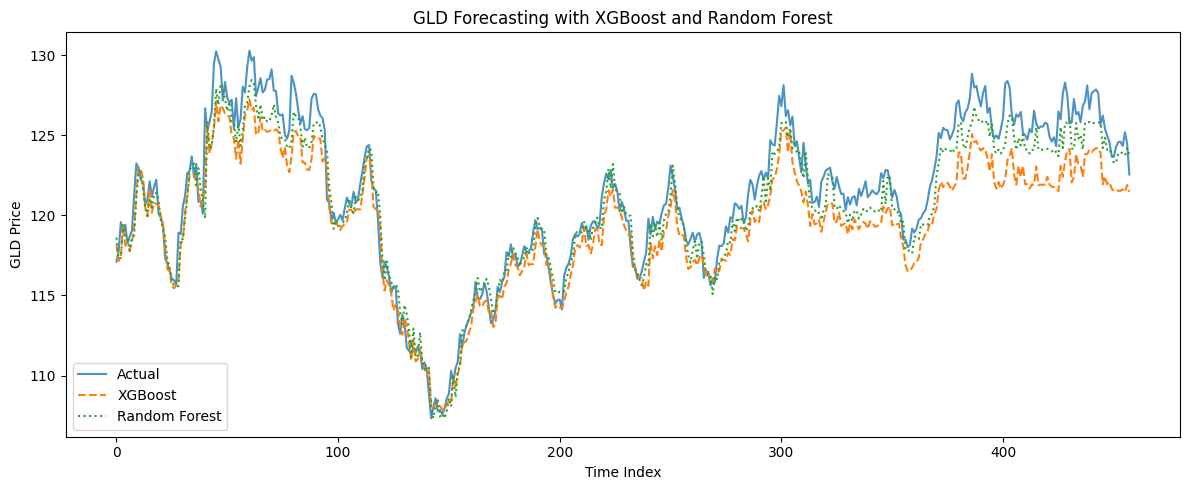

In [24]:
#Gold Price Forecast with XGBoost
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
# Load required columns
df_2 = df[['GLD', 'SPX', 'USO', 'SLV', 'EUR/USD']].copy()

# Create lag features
df_2['GLD_lag1'] = df_2['GLD'].shift(1)
df_2['GLD_lag2'] = df_2['GLD'].shift(2)
df_2.dropna(inplace=True)  # Drop rows with NaNs after shifting

# Define features and target
X = df_2.drop('GLD', axis=1)
y = df_2['GLD']
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
def evaluate(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name} RMSE: {rmse:.4f}")
    print(f"{name} MAE: {mae:.4f}\n")

evaluate("XGBoost", y_test, xgb_pred)
evaluate("Random Forest", y_test, rf_pred)

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual', alpha=0.8)
plt.plot(xgb_pred, label='XGBoost', linestyle='--')
plt.plot(rf_pred, label='Random Forest', linestyle='dotted')
plt.legend()
plt.title("GLD Forecasting with XGBoost and Random Forest")
plt.xlabel("Time Index")
plt.ylabel("GLD Price")
plt.tight_layout()
plt.show()





In [25]:
!pip install keras-tuner
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Ensure this is run before defining the model
target_col_index = df_2.columns.get_loc('GLD')  # index of GLD column
X, y = create_multivariate_sequences(scaled_data, target_col_index, time_step=60)

# Split into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=128, step=32),
                   return_sequences=True,
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=32)))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1))

    model.compile(optimizer=Adam(learning_rate=hp.Choice('lr', [1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error')
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='lstm_tuning',
    project_name='gold_forecast')

tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=64)
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate
loss = best_model.evaluate(X_test, y_test)
print(f"Best model test loss: {loss}")


Trial 10 Complete [00h 02m 07s]
val_loss: 0.0005569733330048621

Best val_loss So Far: 0.0003298225929029286
Total elapsed time: 00h 20m 01s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.9992e-04
Best model test loss: 0.0003298225346952677
